# Анализ популярности компьютерных игр в интернет-магазине.

Представлены данные по продажам в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.



### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Открытие файла с данными и изучение общей информации.

In [101]:
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import norm
import matplotlib.pyplot as plt

In [102]:
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [103]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [104]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Шаг 2. Подготовка данных.

In [105]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [106]:
for row in games:
    print(games[row].value_counts())

Need for Speed: Most Wanted                           12
FIFA 14                                                9
Madden NFL 07                                          9
LEGO Marvel Super Heroes                               9
Ratatouille                                            9
                                                      ..
Donkey Konga 2                                         1
TouchMaster 2                                          1
ThunderStrike 2                                        1
Kuma no Pooh-San: 100 Acre no Mori no Cooking Book     1
Rome: Total War - Gold Edition                         1
Name: Name, Length: 11559, dtype: int64
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD     

Видим 2 пропуска в названии игр, нужно будет их убрать. Так же много пропусков в столбце в годом выпуска, скорее всего из-за того, что значения года были введены неверно. И так же пропуски в столбце с оценками, вероятнее всего из-за того, что не каждый пользователь играл во все игры, а только в несколько, соотв-но те, в которые он не играл и будут пропусками.

In [107]:
# приыедем названия к нижнему регистру
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'] 

заменим данные на нужные типы- столбец с годом выпуска заменим на целочисленный, а столбец с оценками юзеров на вещественный

In [108]:
# приведем данные к нужным типам
games.loc[(games['user_score'] == 'tbd') | (games['user_score'].isna()), 'user_score'] = -1
games['user_score'] = pd.to_numeric(games['user_score'])

в столбце с годом выпуска много пропусков, но сложно понять, какие года вставить на эти места, так что заменим пропуски на значения, которые не помешают в анализе:

In [109]:
games['year_of_release'].fillna(-1, inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int')

In [110]:
games.dropna(subset=['name'], inplace=True)

In [111]:
games.loc[(games['critic_score'].isna()), ['critic_score']] = -1
games.loc[(games['rating'].isna()), ['rating']] = -1
games['genre'] = games['genre'].fillna(value = 0)

In [112]:
games['user_score'].isnull().sum()

0

In [113]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,-1
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,-1


In [114]:
# считаем суммарные продажи во всех регионах
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['jp_sales']

In [115]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,77.86
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,46.28
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,36.02
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,33.10
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,40.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.02
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.02
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,-1,0.01


In [116]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
all_sales          16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


### Шаг 3. Проведение исследовательского анализа данных.

In [118]:
# смотрим, сколько игр выпускалось в разные годы
games_years = games.pivot_table(index='year_of_release', values='name', aggfunc=['count']).sort_values('year_of_release', ascending=False)

In [119]:
games_years

,count
,name
year_of_release,
2016,502
2015,606
2014,581
2013,544
2012,653
2011,1136
2010,1255
2009,1426


In [120]:
# смотрим, как менялись продажи по платформам по годам и по платформам
#platforms_sales = games.pivot_table(index='platform', values='all_sales', aggfunc=['sum'])
platforms_sales = games.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum')
platforms_sales.fillna(0, inplace=True) 

platforms_saless = games.pivot_table(index='platform', values='all_sales', aggfunc='sum')

In [121]:
platforms_sales

year_of_release,-1,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,10.43,11.26,35.36,28.57,5.78,0.27,0.45,0.67,1.93,0.73,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,71.63,68.75,77.54,62.44,42.27,22.53
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.04,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,3.67,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,...,162.66,158.38,135.20,99.34,28.62,14.14,1.42,0.00,0.00,0.00
GB,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.75,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,5.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,2.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Построим наглядную диаграмму того, как менялись продажи по платформам по годам:

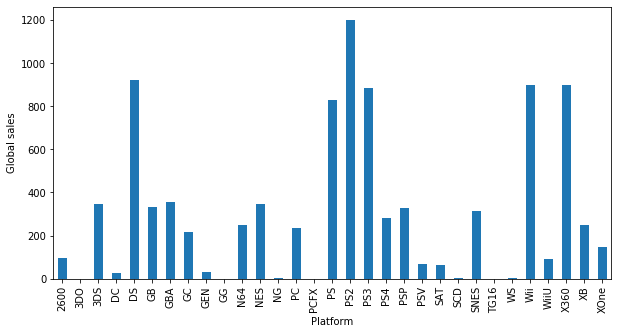

In [122]:
platforms_saless.plot(kind='bar', y='all_sales', figsize=(10, 5), legend=False).set(xlabel='Platform', ylabel='Global sales')
plt.show()

Видим, что самыми продаваемыми платформами являются платформы PS3, DS, PS3, Wii и X360.

In [123]:
platforms_saless

,all_sales
platform,
2600,96.07
3DO,0.20
3DS,346.31
DC,24.24
DS,922.43
GB,332.38
GBA,357.45
GC,215.33
GEN,30.13


Теперь выделим 5 самых продаваемых платформ, отмеченных ранее (PS3, DS, PS3, Wii и X360) и построим для них распределение продаж по годам:

In [124]:
# выделим 5 самых прибыльных платформ в нужном нам временном периоде после 1994 года выпуска
top5platf = games.query('year_of_release >= 1994').pivot_table(index='platform', values='all_sales', aggfunc='sum').nlargest(5, 'all_sales').reset_index()
top5platf


,platform,all_sales
0,PS2,1180.63
1,DS,918.72
2,X360,888.66
3,Wii,881.75
4,PS3,876.16


In [126]:
# выделим, какие платформы имели какие продажи по годам
games_sales_per_year = games.query('year_of_release >= 1994').groupby(['platform', 'year_of_release']).agg({'all_sales': 'sum'}).reset_index()



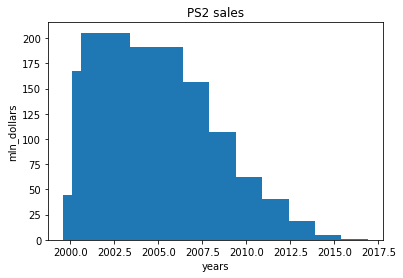

In [127]:
# для PS2
ps2 = games_sales_per_year[games_sales_per_year['platform'] == 'PS2']
plt.bar(ps2['year_of_release'], ps2['all_sales'])
plt.xlabel('years')
plt.ylabel('mln_dollars')
plt.title('PS2 sales')
plt.show()

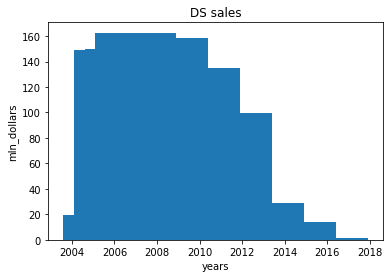

In [128]:
# для DS
ds = games_sales_per_year[games_sales_per_year['platform'] == 'DS']
plt.bar(ds['year_of_release'], ds['all_sales'])
plt.xlabel('years')
plt.ylabel('mln_dollars')
plt.title('DS sales')
plt.show()

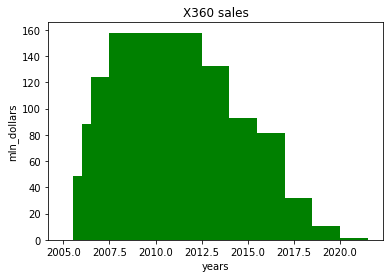

In [129]:
x360 = games_sales_per_year[games_sales_per_year['platform'] == 'X360']
width = 0.001
plt.bar(x360['year_of_release'], x360['all_sales'], width, color='green')
plt.xlabel('years')
plt.ylabel('mln_dollars')
plt.title('X360 sales')
plt.show()

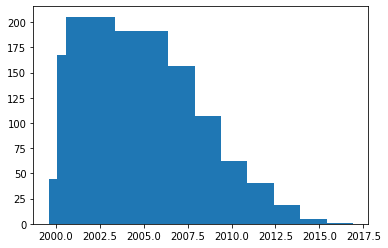

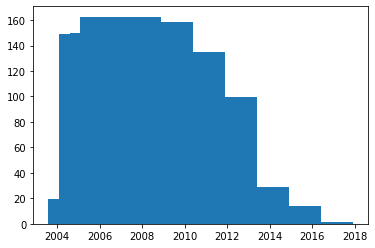

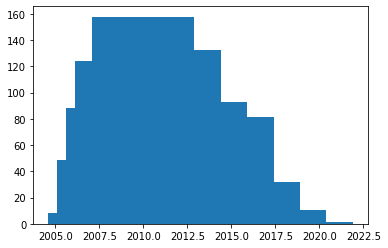

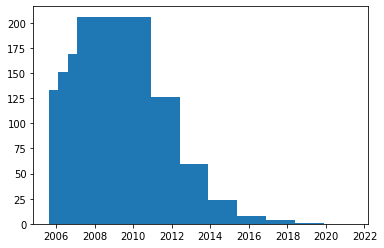

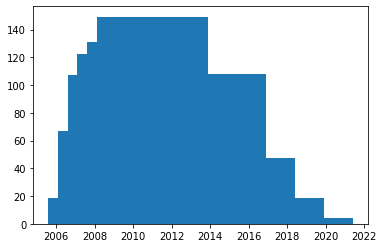

In [130]:
platforms = ['PS2', 'DS', 'X360', 'Wii', 'PS3']
for column in platforms:
    pltf = games_sales_per_year[games_sales_per_year['platform'] == column]
    plt.bar(pltf['year_of_release'], pltf['all_sales'])
    plt.show()

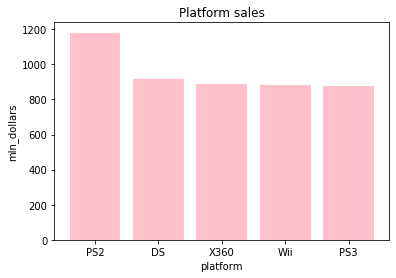

In [131]:
# построим график общих продаж по платформам из выбранных топ 5, лидирующих по продажам, после 1994 г
#top5platf.hist(bins=30)
plt.bar(top5platf['platform'], top5platf['all_sales'], color='pink')
plt.xlabel('platform')
plt.ylabel('mln_dollars')
plt.title('Platform sales')
plt.show()

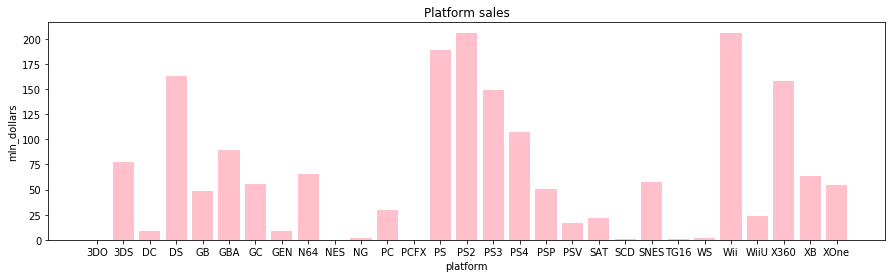

In [132]:
# продажи на платформах в актуальном диапазоне лет после 1994 года
plt.figure(figsize=(15, 4))
plt.bar(games_sales_per_year['platform'], games_sales_per_year['all_sales'], color='pink')
plt.xlabel('platform')
plt.ylabel('mln_dollars')
plt.title('Platform sales')
plt.show()

Средний срок существования игровой платформы примерно 10 лет.

При этом отметим, что самыми успешными платформами с высокими продажами являются  PS2, Wii, PS и X360

Видим, что платформы XOne и PS4 актуальны и сейчас, при этом жизнь остальных идет на спад. Даты выхода этих платформ - 2013 год - его и возьмем за начало актуального периода.



In [133]:
# актуальный период:
games_sales_13_16 = games.query('year_of_release >= 2013').groupby(['platform', 'year_of_release']).agg({'all_sales': 'sum'}).reset_index()
games_sales_13_16

,platform,year_of_release,all_sales
0,3DS,2013,77.54
1,3DS,2014,62.44
2,3DS,2015,42.27
3,3DS,2016,22.53
4,DS,2013,1.42
5,PC,2013,11.27
6,PC,2014,12.38
7,PC,2015,7.93
8,PC,2016,4.89
9,PS3,2013,107.98


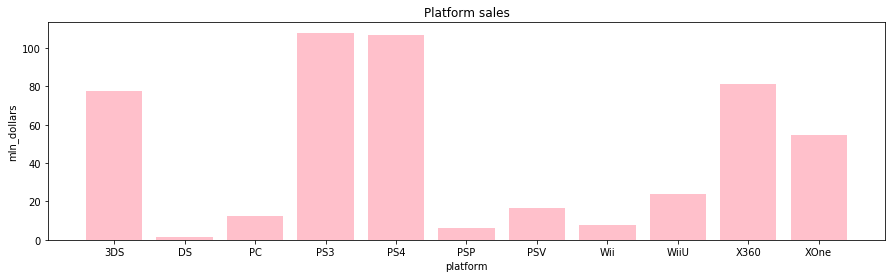

In [134]:
# выведем на графике продажи по платформам за актуальный период 2013-2016 год
plt.figure(figsize=(15, 4))
plt.bar(games_sales_13_16['platform'], games_sales_13_16['all_sales'], color='pink')
plt.xlabel('platform')
plt.ylabel('mln_dollars')
plt.title('Platform sales')
plt.show()

In [135]:
import seaborn as sns

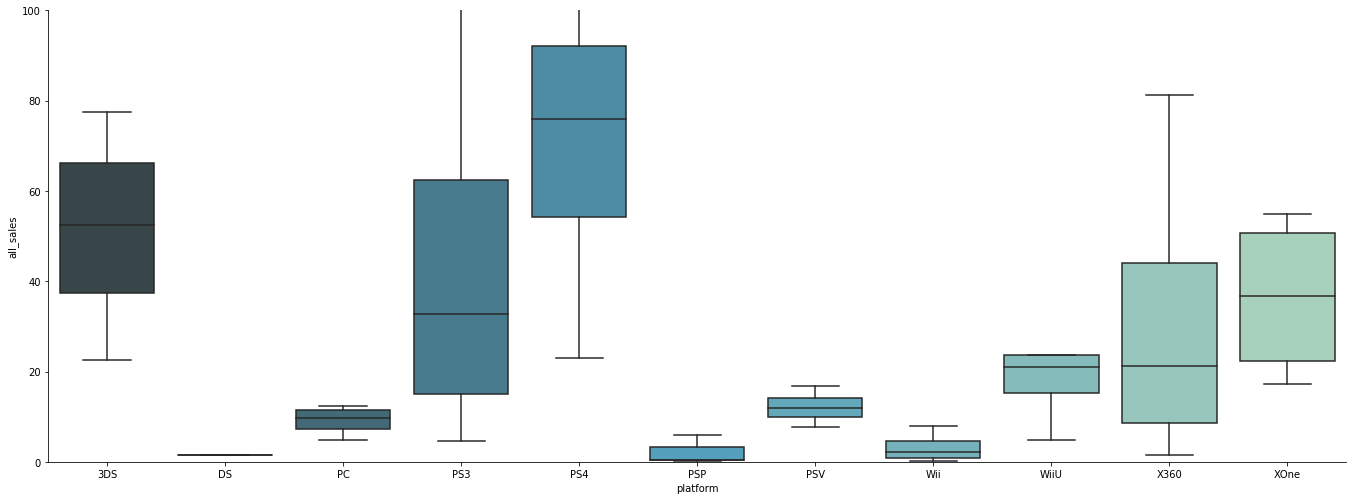

In [136]:
# смотрим глобальные продажи всех игр по платформам, актуальных в выбранный период
sns.catplot(x="platform", 
            y='all_sales', 
            kind="box", 
            data=games_sales_13_16, 
            orient='v', 
            height=7, 
            aspect=2.7, 
            palette='GnBu_d')
_ = plt.ylim(0, 100)

Видим, что самыми прибыльными за актуальный период (2013-2016 гг.) являются PS4, PS3 и 3DS. При этом  лидерами по средним продажам являются X360, XOne и WiiU.


Рассмотрим как влияют отзывы критиков и пользователей на продажи игр платформы PS4 - лидера по продажам в период 2013-2016 гг:

In [137]:
# отдельны выделим актуальный период из всех данных
actual_data = games.query('year_of_release >= 2013')

In [138]:
actual_data['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

In [139]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,18.07
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.92
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,12.61
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,18.17
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,11.03
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.02
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.02
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.02
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.02


In [140]:
# выделим данные по актуальной платформе 
ps4 = actual_data.query('platform == "PS4" and (user_score != -1) and (critic_score != -1)')

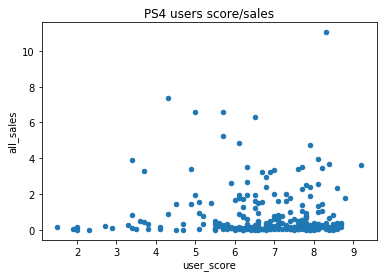

In [141]:
# строим диаграмму рассеяния для отзывов пользователей
ps4.plot(x='user_score', y='all_sales', kind='scatter', title='PS4 users score/sales')
plt.show()

In [142]:
# считаем коэфф корреляции
ps4['user_score'].corr(ps4['all_sales'])

-0.023643049291614253

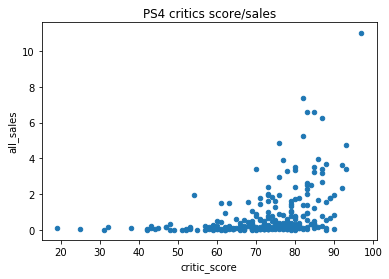

In [143]:
# строим диаграмму рассеяния для отзывов критиков
ps4.plot(x='critic_score', y='all_sales', kind='scatter', title = 'PS4 critics score/sales')
plt.show()

In [144]:
# считаем коэфф корреляции
ps4['critic_score'].corr(ps4['all_sales'])

0.4087539742501459

В результате видно, что отзывы пользователей особо не влияют на продажи игр (коэфф. корреляции -0.24), при этом отзывы критиков оказывают небольшое влияние на продажи (коэфф. корреляции 0,41).

Теперь соотнесем этот вывод с продажами на других платформах. Рассмотрим платформeу XOne, котрая так же как и PS4 , является актуальной и на данный моммент:

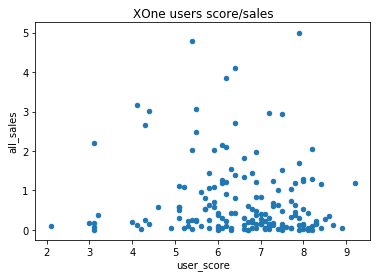

In [145]:
# строим диаграмму рассеяния для отзывов пользователей
xone = actual_data.query('platform == "XOne" and (user_score != -1) and (critic_score != -1)')
xone.plot(x='user_score', y='all_sales', kind='scatter', title='XOne users score/sales')
plt.show()

In [146]:
# считаем коэфф корреляции
xone['user_score'].corr(xone['all_sales'])

-0.09303242378166401

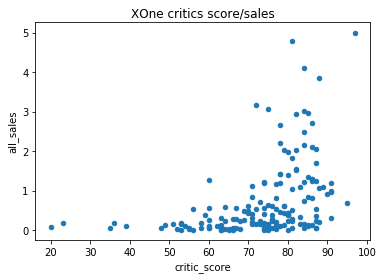

In [147]:
# строим диаграмму рассеяния для отзывов критиков
xone = actual_data.query('platform == "XOne" and (user_score != -1) and (critic_score != -1)')
xone.plot(x='critic_score', y='all_sales', kind='scatter', title='XOne critics score/sales')
plt.show()

In [148]:
# считаем коэфф корреляции
xone['critic_score'].corr(xone['all_sales'])

0.4107923374599104

Вывод тот же, что и с ранее рассмотренной платформой. Отзывы пользователей не влияют на продажи ( коэфф. кор. -0.093), при этом отзывы критиков немного влияют на продажи (коэфф корр. 0.41)



In [149]:
genre = actual_data.groupby(['genre']).agg({'all_sales':['sum']})

In [150]:
genre_games = actual_data.groupby(['genre']).agg({'name':['count']})

In [152]:
genre

,all_sales
,sum
genre,
Action,325.16
Adventure,27.03
Fighting,39.40
Misc,65.93
Platform,43.30
Puzzle,4.19
Racing,37.75
Role-Playing,185.45


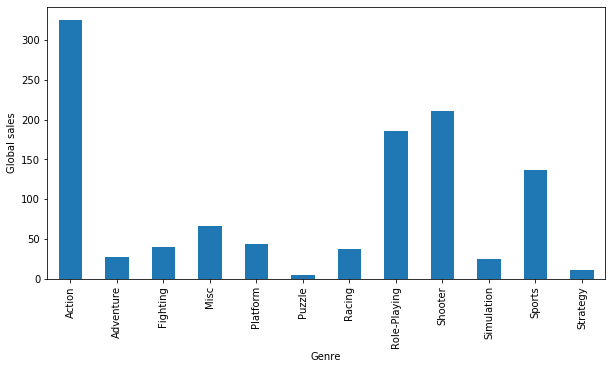

In [153]:
genre.plot(kind='bar', y='all_sales', figsize=(10, 5), legend=False).set(xlabel='Genre', ylabel='Global sales')
plt.show()

In [154]:
genre_games

,name
,count
genre,
Action,766
Adventure,245
Fighting,80
Misc,155
Platform,74
Puzzle,17
Racing,85
Role-Playing,292


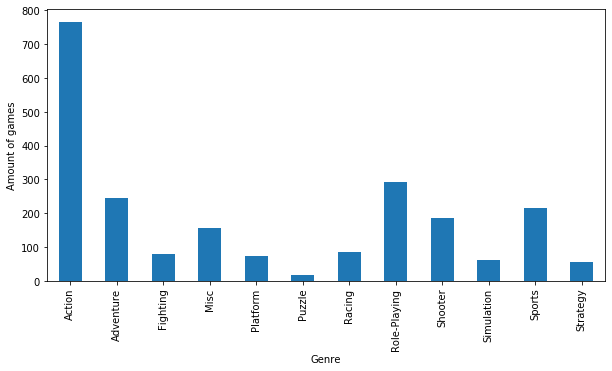

In [155]:
genre_games.plot(kind='bar', y='name', figsize=(10, 5), legend=False).set(xlabel='Genre', ylabel='Amount of games')
plt.show()

По распределению можно сделать вывод, что самыми продаваемыми являются жанры Action, Shooter и Role-Playing. При этом больше всего выпущенных игр приходится на жанры Action, Role-Playing и Adventure. Выделяются так же жанры с очень низкими продажами, например жанры Puzzle и Strategy. Так же выделяется жанр Action  с сымыми высокими продажами, больше, чем в 1.5 раза превышающими продажи второго по продаваемости жанра Shooter.



### Шаг 4. Составление портрета пользователя каждого региона.

Определим самые популярные платформы (топ-5).

In [156]:
# для северной америки
top5platf_actual_na = games.query('year_of_release >= 2013').pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
top5platf_actual_na.columns = ['sales']

In [157]:
top5platf_actual_na

,sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


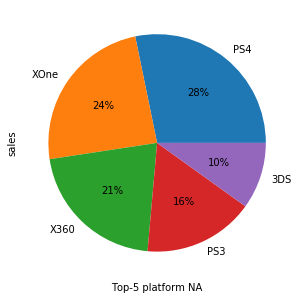

In [158]:

top5platf_actual_na.plot(kind='pie', y='sales', x='platform', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Top-5 platform NA')
plt.show()

In [159]:
# для европы
top5platf_actual_eu = games.query('year_of_release >= 2013').pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
top5platf_actual_eu.columns = ['sales']
top5platf_actual_eu

,sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


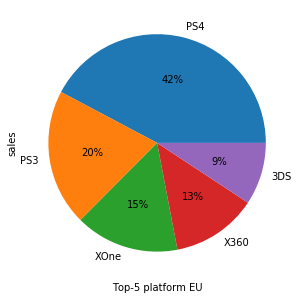

In [160]:
top5platf_actual_eu.plot(kind='pie', y='sales', x='platform', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Top-5 platform EU')
plt.show()

In [161]:
# для японии
top5platf_actual_jp = games.query('year_of_release >= 2013').pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
top5platf_actual_jp.columns = ['sales']
top5platf_actual_jp

,sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


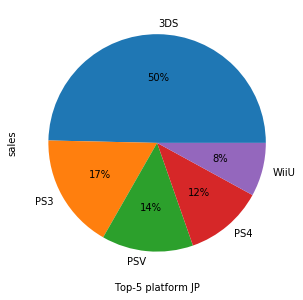

In [162]:
top5platf_actual_jp.plot(kind='pie', y='sales', x='platform', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Top-5 platform JP')
plt.show()

В результате можно сделать вывод, что популярные платформы в северной америке и европе отличаются от японии. Самая популярная платформа в северной америке и европе это PS4, при этом в японии самая популярная это 3DS.Причем PS4 составляет в амарике и европе 28% и 42% соответственно, а 3DS в японии все 50%.

Определим самые популярные жанры (топ-5).

In [163]:
# для северной америки
top5genre_na = games.query('year_of_release >= 2013').pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')

top5genre_na.columns = ['sales']

top5genre_na

,sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


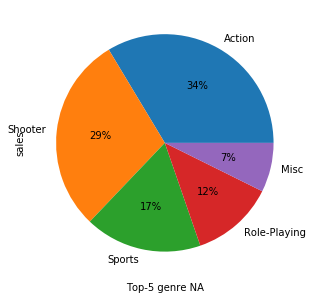

In [164]:
top5genre_na.plot(kind='pie', y='sales', x='genre', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Top-5 genre NA')
plt.show()

In [165]:
# для европы
top5genre_eu = games.query('year_of_release >= 2013').pivot_table(index='genre', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
top5genre_eu.columns = ['sales']
top5genre_eu

,sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


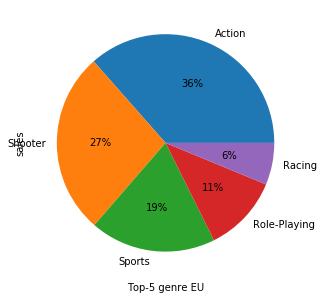

In [166]:
top5genre_eu.plot(kind='pie', y='sales', x='genre', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Top-5 genre EU')
plt.show()

In [167]:
# для японии
top5genre_jp = games.query('year_of_release >= 2013').pivot_table(index='genre', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
top5genre_jp.columns = ['sales']
top5genre_jp

,sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


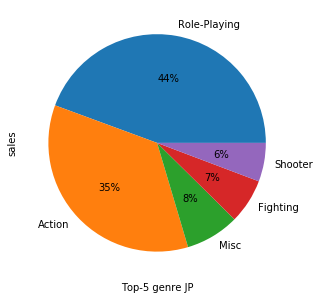

In [168]:
top5genre_jp.plot(kind='pie', y='sales', x='genre', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Top-5 genre JP')
plt.show()

В результате видим, что в америке и европе одинаково популярны игры жанров Action и Shooter, причем Action лидирует в обоих регионах (34 и 36% соответтсвенно). В японии самая популярная игра это Role_Playing (44%), вторая по популярности - Action (35%).

Опишем, как влияет рейтинг ESRB

In [169]:
# в америке
rating_sales_na = games.loc[games['rating'] != -1].query('year_of_release >= 2013').pivot_table(index='rating', values='na_sales', aggfunc='sum')
rating_sales_na.columns = ['sales']
rating_sales_na

,sales
rating,
E,79.05
E10+,54.24
M,165.21
T,49.79


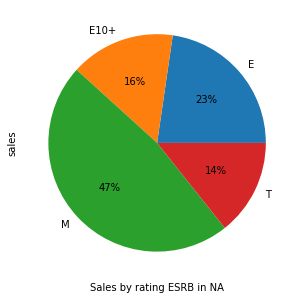

In [170]:
rating_sales_na.plot(kind='pie', y='sales', x='rating', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Sales by rating ESRB in NA')
plt.show()

In [171]:
# в европе
rating_sales_eu = games.loc[games['rating'] != -1].query('year_of_release >= 2013').pivot_table(index='rating', values='eu_sales', aggfunc='sum')
rating_sales_eu.columns = ['sales']
rating_sales_eu

,sales
rating,
E,83.36
E10+,42.69
M,145.32
T,41.95


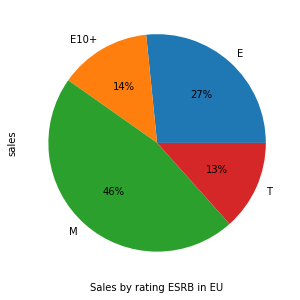

In [172]:
rating_sales_eu.plot(kind='pie', y='sales', x='rating', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Sales by rating ESRB in EU')
plt.show()

In [173]:
# в японии
rating_sales_jp = games.loc[games['rating'] != -1].query('year_of_release >= 2013').pivot_table(index='rating', values='jp_sales', aggfunc='sum')
rating_sales_jp.columns = ['sales']
rating_sales_na

,sales
rating,
E,79.05
E10+,54.24
M,165.21
T,49.79


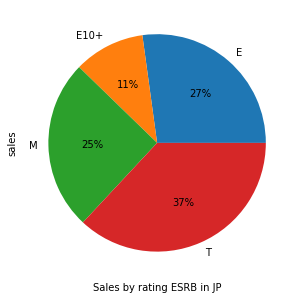

In [174]:
rating_sales_jp.plot(kind='pie', y='sales', x='rating', autopct='%1.0f%%', figsize=(10, 5), legend=False).set(xlabel='Sales by rating ESRB in JP')
plt.show()

Видим, что в америке и европе лидирует возрастная категория Mature (M) (47 и 46% соответственно), при этом в японии лидирующая возрастная категория - это Teen(T) (37%). Нельзя точно понять, что в японии взрослые значительно меньше играют в игры, чем подростки, потому что неизвестно, соответствует ли реальный возраст игрока с возрастной категорией игры.




Портрет пользователя северной америки:

В топе любимых платформ это PS4 (28%) и XOne(24%), они предпочитают в основном стационарные игровые консоли. Любимые жанры - Action(34%) и Shooter(29%). В основном играет взрослая категория Mature (M) (47%).

Портрет пользователя европы:

Любимые платформы - это PS4 (42%) и PS3(23%), тоже предпочитают стационарные консоли. Любимые жанры - Action(36%) и Shooter(27%). В основном играет взрослая категория Mature (M) (46%)


Портрет пользователя японии:

Янпонцы же наоборот в основном предпочитают портитичные игровые платформы (3DS) - 50% пользователей. В японии любят игру Role_Playing (44%), а вторая по популярности - Action (35%). Лидируюет возрастная категория  Teen(T) (37%).


### Шаг 5. Проверка гипотез.

Проверим гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Формулировки Н0 и Н1 для первого задания:

H0 — средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

H1 —  средние пользовательские рейтинги платформ Xbox One и PC различаются.

Формулировки Н0 и Н1 для второго задания:

H0 — средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

H1 — средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В качестве уровня статистической значимости принимается значение 0.05

В данном анализе будем применять t-тест. При этом методе требуется установить фиксированное значение уровня значимости, допустимая для данной задачи вероятность ошибки первого рода, то есть того, что гипотеза на самом деле верна, но будет отвергнута процедурой проверки.Формируем гипотезу Н0, на основе ее формулируем альтернативную гипотезу Н1. И далее проводится анализ, в результате которого делается вывод «данные противоречат нулевой гипотезе при уровне значимости alpha = ' '». Гипотеза отвергается, либо делается вывод «данные не противоречат нулевой гипотезе при уровне значимости alpha = ' '». Гипотеза принимается.

In [175]:

actual_data_final = actual_data.query('(user_score != -1) and (critic_score != -1)')

In [176]:
# сделаем выборку данных по платформам xbox и pc
xbox_one = actual_data_final[actual_data_final['platform'] == 'XOne']['user_score']
pc = actual_data_final[actual_data_final['platform'] == 'PC']['user_score']


print('cреднее xbox_one: ',pd.Series(xbox_one).mean())
print('cреднее pc: ',pd.Series(pc).mean())

alpha = 0.05

results =  st.ttest_ind(
    xbox_one, 
    pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее xbox_one:  6.538181818181818
cреднее pc:  6.3020270270270276
p-значение: 0.17306926618147322
Не получилось отвергнуть нулевую гипотезу


В целом можно сказать, что средние рейтинги платформ Xbox и PC не сильно отличаются. Только проверяя гипотезы я не могу точно сказать какой рейтинг выше или ниже, но могу сказать, что он почти одинаков. Из-за двухсторонности гипотезы  мы не можем судить об отношении в генеральной совокупности. По выведенным средним значениям, при этом при уровне  статистической значимости 0.05 нам не удалось опровергнуть нулевую гипотезу, значения одинаковы (6.54 - xbox_one и 6.3 - pc)

In [177]:
# сделаем выборку данных по жанрам action и sport
action = actual_data_final[actual_data_final['genre'] == 'Action']['user_score']   
sport = actual_data_final[actual_data_final['genre'] == 'Sports']['user_score']


print('cреднее actiont: ',pd.Series(action).mean())
print('cреднее sport: ',pd.Series(sport).mean())

alpha = 0.05

results =  st.ttest_ind(
    action, 
    sport)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее actiont:  6.9362459546925574
cреднее sport:  5.665454545454545
p-значение: 1.684099430689953e-16
Отвергаем нулевую гипотезу


Рейтинги жанров action и sport различаются. Только проверяя гипотезы я не могу точно сказать какой рейтинг выше или ниже, но могу сказать, что он различается. Из-за двухсторонности гипотезы мы не можем судить об отношении в генеральной совокупности. По выведенным средним значениям, при этом при уровне  статистической значимости 0.05 нам  удалось опровергнуть нулевую гипотезу, значения различаются. Средний пользовательский рейтинг жанра action(6.94) выше, чем sport(5.67).



### Шаг 6. Общий вывод.

В данном проекте был дан  исходный датасет с данными о продажах компьютерных игр в разных регионах. Для начала мы обработали данные :выделили пропуски, заменили их соответствующими значениями, привели данные к нужным типам.

Далее определили актуальный период, который стоит рассматривать в рамках данного анализа, это период с 2013 года. Выяснили, как отзывы влияют на продажи игр, вычислили самые прибыльные жанры и платформы. Составили портрет пользователя каждого региона, узнали в долях %, какие жанры и платформы полулярны в трех разных регионах и узнали как рейтинг ESRB влияет на продажи в отдельном регионе.
В результате проведенного анализа выяснено, что  средний срок существования игровой платформы примерно 10 лет.
При этом отметим, что самыми успешными платформами с высокими продажами являются PS2, Wii, PS и X360.
Видим, что платформы XOne и PS4 актуальны и сейчас, при этом жизнь остальных идет на спад. Даты выхода этих платформ - 2013 год - поэтому его мы и взяли за начало актуального периода.
Лидером по продажам является платформа PS4, для нее узнали, что отзывы пользователей особо не влияют на продажи игр (коэфф. корреляции -0.24), при этом отзывы критиков оказывают небольшое влияние на продажи (коэфф. корреляции 0,41). Так же исследовали влияние отзывов на продажи платформы XOne, так же как и PS4 являющейся актуальной в настоящее время - отзывы пользователей так же не влияют на продажи ( коэфф. кор. -0.093), при этом отзывы критиков немного влияют на продажи (коэфф корр. 0.41).

Установили, что самыми продаваемыми являются жанры Action, Shooter и Role-Playing. При этом больше всего выпущенных игр приходится на жанры Action, Role-Playing и Adventure. Выделяются так же жанры с очень низкими продажами, например жанры Puzzle и Strategy. Так же выделяется жанр Action с сымыми высокими продажами, больше, чем в 1.5 раза превышающими продажи второго по продаваемости жанра Shooter.

Популярные платформы в северной америке и европе отличаются от японии. Самая популярная платформа в северной америке и европе это PS4, при этом в японии самая популярная это 3DS.Причем PS4 составляет в амарике и европе 28% и 42% соответственно, а 3DS в японии все 50%. Также в америке и европе одинаково популярны игры жанров Action и Shooter, причем Action лидирует в обоих регионах (34 и 36% соответтсвенно). В японии самая популярная игра это Role_Playing (44%), вторая по популярности - Action (35%).

В америке и европе лидирует возрастная категория Mature (M) (47 и 46% соответственно), при этом в японии лидирующая возрастная категория - это Teen(T) (37%). Нельзя точно понять, что в японии взрослые значительно меньше играют в игры, чем подростки, потому что неизвестно, соответствует ли реальный возраст игрока с возрастной категорией игры.

Также стоит отметить, что если создатели игры озадачатся отзывами пользователей, то нужно отметить, что жанр sports имеет рейтинг выше, чем у action.